# PR-FASD

- resnet-18

In [18]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================
import time
import tensorflow as tf
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     try:
#         for gpu in gpus:
#               tf.config.experimental.set_memory_growth(gpu, True)
#     except RuntimeError as e:
#         print(e)

import os
import numpy as np
import cv2
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

%matplotlib inline

start=time.time()

inputSize = 224
batchSize= 16
    
trainDB = 'T_angle'
testDB = 'T_angle'
    
dataDir = 'D:\\Face_Database\\B-Database\\protocol_1'
# resnet
modelPath = 'D:\\ysg\\4_pc\\densenet-spoofing\\Resnet_result\\trained_model_protocol1\\0.001\\T_angle-26-0.0695.hdf5'
    
print('>> model loaded: {}'.format(os.path.basename(modelPath)))
K.clear_session()
model = load_model(modelPath)   
    

val_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

 #''' evaluating EER ''' # densenet-1 resnet-2
y_true = val_generator.classes
y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()
    

# EER
fpr, tpr, threshold = roc_curve(y_true, y_score)
fnr = 1 - tpr
eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2


    
#''' evaluating HTER '''
y_true = test_generator.classes
y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()
    

# Calculate EER threshold
fpr2, tpr2, threshold = roc_curve(y_true, y_score)
fnr = 1 - tpr2
eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr2)))]

 
# HTER
y_pred = y_score > eer_threshold
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
labels = test_generator.class_indices
# print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5
  
    
    
# ROC curve
Accuracy2 = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

print('EER: {:.4f}\tHTER: {:.4f}'.format(val_eer, hter))

print("time : ",time.time()-start)
    
print('>> finished')




>> model loaded: T_angle-26-0.0695.hdf5
Found 10080 images belonging to 2 classes.
Found 18720 images belonging to 2 classes.
EER: 0.0304	HTER: 0.0261
time :  334.19656467437744
>> finished


- densenet121

In [19]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================
import tensorflow
import time
import os
import numpy as np
import cv2
import tensorflow.keras
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

%matplotlib inline

start=time.time()

inputSize = 224
batchSize=8
    
trainDB = 'T_angle'
testDB = 'T_angle'
    
dataDir = 'D:\\Face_Database\\B-Database\\protocol_1'
# densenet
modelPath = 'D:\\ysg\\4_pc\\densenet-spoofing\\Densenet_result\\0.001\\result_angle\\T_angle-13-0.0578.hdf5'
    
print('>> model loaded: {}'.format(os.path.basename(modelPath)))
K.clear_session()
model = load_model(modelPath)   
    

val_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

 #''' evaluating EER ''' # densenet-1 resnet-2
y_true = val_generator.classes
y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()
    

# EER
fpr, tpr, threshold = roc_curve(y_true, y_score)
fnr = 1 - tpr
eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2


    
#''' evaluating HTER '''
y_true = test_generator.classes
y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()
    

# Calculate EER threshold
fpr1, tpr1, threshold = roc_curve(y_true, y_score)
fnr = 1 - tpr1
eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr1)))]

 
# HTER
y_pred = y_score > eer_threshold
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
labels = test_generator.class_indices
# print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5
  
    
    
# ROC curve
Accuracy1 = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

print('EER: {:.4f}\tHTER: {:.4f}'.format(val_eer, hter))
print("time : ",time.time()-start)
print('>> finished')

    


>> model loaded: T_angle-13-0.0578.hdf5
Found 10080 images belonging to 2 classes.
Found 18720 images belonging to 2 classes.
EER: 0.0196	HTER: 0.0204
time :  954.144987821579
>> finished


>> finished


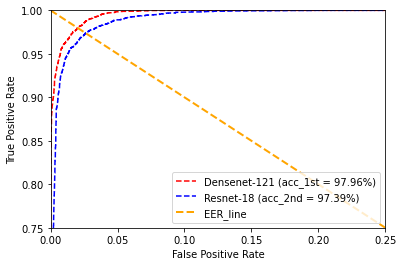

<Figure size 432x288 with 0 Axes>

In [20]:
   # roc_auc = roc_auc_score(y_true, y_score)

#plt.figure()
lw = 2

    
plt.plot(fpr1, tpr1, 'r--', label='Densenet-121 (acc_1st = %0.2f%%)' % Accuracy1)
plt.plot(fpr2, tpr2, 'b--', label='Resnet-18 (acc_2nd = %0.2f%%)' % Accuracy2)
# plt.plot(fpr3, tpr3, 'b--', label='ROC_3rd (acc_3rd = %0.2f%%)' % Accuracy3)
plt.plot([0, 1], [1, 0], color='orange',label='EER_line', lw=lw, linestyle='--')

plt.xlim([0.0, 0.25])
plt.ylim([0.75, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = "lower right")

plt.savefig('model_roccurve.png')
plt.figure()

    
print('>> finished')

# CASIA

- densenet

In [22]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================
import tensorflow
import os
import numpy as np
import cv2
import tensorflow.keras
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

%matplotlib inline


inputSize = 224
batchSize=8
    
trainDB = 'CASIA-FASD'
testDB = 'CASIA-FASD'
    
dataDir = 'D:\\Face_Database\\public-Database\\1_crop_result'
# densenet
modelPath = 'D:\\ysg\\4_pc\\densenet-spoofing\\Densenet_result\\0.001\\result_CASIA\\Result-14-0.0044.hdf5'
    
print('>> model loaded: {}'.format(os.path.basename(modelPath)))
K.clear_session()
model = tensorflow.keras.models.load_model(modelPath)   
    

# val_datagen = ImageDataGenerator(rescale=1.0/255.0)
# val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

#  #''' evaluating EER ''' # densenet-1 resnet-2
# y_true = val_generator.classes
# y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()
    

# # EER
# fpr, tpr, threshold = roc_curve(y_true, y_score)
# fnr = 1 - tpr
# eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
# val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2


    
#''' evaluating HTER '''
y_true = test_generator.classes
y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()
    

# Calculate EER threshold
fpr1, tpr1, threshold = roc_curve(y_true, y_score)
fnr = 1 - tpr1
eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr1)))]

 
# HTER
y_pred = y_score > eer_threshold
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
labels = test_generator.class_indices
# print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5
  
    
    
# ROC curve
Accuracy1 = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

print('EER: {:.4f}\tHTER: {:.4f}'.format(val_eer, hter))
print('>> finished')

    


>> model loaded: Result-14-0.0044.hdf5
Found 40389 images belonging to 2 classes.
EER: 0.0196	HTER: 0.0235
>> finished


- resnet

In [23]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import tensorflow
import os
import numpy as np
import cv2
import tensorflow.keras
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

%matplotlib inline


inputSize = 224
batchSize=16
    
trainDB = 'CASIA-FASD'
testDB = 'CASIA-FASD'
    
dataDir = 'D:\\Face_Database\\public-Database\\1_crop_result'
# resnet
modelPath = 'D:\\ysg\\4_pc\\densenet-spoofing\\Resnet_result\\CASIA-FASD\\001\\Result-28-0.0033.hdf5'
    
print('>> model loaded: {}'.format(os.path.basename(modelPath)))
K.clear_session()
model = load_model(modelPath)   
    

# val_datagen = ImageDataGenerator(rescale=1.0/255.0)
# val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

#  #''' evaluating EER ''' # densenet-1 resnet-2
# y_true = val_generator.classes
# y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()
    

# # EER
# fpr, tpr, threshold = roc_curve(y_true, y_score)
# fnr = 1 - tpr
# eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
# val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2


    
#''' evaluating HTER '''
y_true = test_generator.classes
y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()
    

# Calculate EER threshold
fpr2, tpr2, threshold = roc_curve(y_true, y_score)
fnr = 1 - tpr2
eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr2)))]

 
# HTER
y_pred = y_score > eer_threshold
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
labels = test_generator.class_indices
# print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5
  
    
    
# ROC curve
Accuracy2 = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

print('EER: {:.4f}\tHTER: {:.4f}'.format(val_eer, hter))
print('>> finished')

    


>> model loaded: Result-28-0.0033.hdf5
Found 40389 images belonging to 2 classes.
EER: 0.0196	HTER: 0.0337
>> finished


>> finished


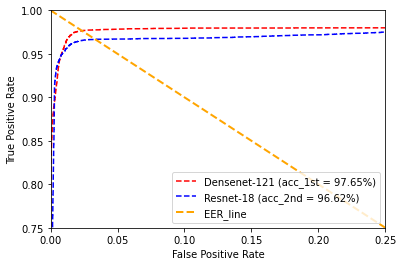

<Figure size 432x288 with 0 Axes>

In [25]:
   # roc_auc = roc_auc_score(y_true, y_score)

#plt.figure()
lw = 2

    
plt.plot(fpr1, tpr1, 'r--', label='Densenet-121 (acc_1st = %0.2f%%)' % Accuracy1)
plt.plot(fpr2, tpr2, 'b--', label='Resnet-18 (acc_2nd = %0.2f%%)' % Accuracy2)
# plt.plot(fpr3, tpr3, 'b--', label='ROC_3rd (acc_3rd = %0.2f%%)' % Accuracy3)
plt.plot([0, 1], [1, 0], color='orange',label='EER_line', lw=lw, linestyle='--')

plt.xlim([0.0, 0.25])
plt.ylim([0.75, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = "lower right")

plt.savefig('model_roccurve.png')
plt.figure()

    
print('>> finished')